<a href="https://colab.research.google.com/github/idrismunir15/activity_classifier/blob/main/activity_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ACTIVITY PREDICTION MODEL USING SENSOR DATA**

In the data collection experiments, we collected data for seven physical activities. These are walking, sitting, standing, jogging, biking, walking upstairs and walking downstairs, which are mainly used in the related studies and they are the basic motion activities in daily life. There were ten participants involved in our data collection experiment who performed each of these activities for 3-4 minutes. All ten participants were male, between the ages of 25 and 30.

The experiments were carried out indoors in one of the university buildings, except biking. For walking, and jogging, the department corridor was used. For walking upstairs and downstairs, a 5-floor building with stairs was used.
Each of these participants was equipped with five smartphones on five body positions:
1.	One in their right jean�s pocket.
2.	One in their left jean�s pocket.
3.	One on belt position towards the right leg using a belt clipper.
4.	One on the right upper arm.
5.	One on the right wrist.
The first three positions are commonly used by people carrying smartphones. The fourth position is usually used when activities like jogging are performed. However, we used this position for all activities to see its role on the performance.  

A smart-watch was simulated with the fifth position as smart-watches are coming into the market these days.  For these experiments, we used Samsung Galaxy SII (i9100) smartphones. The orientation of the smartphones was portrait for the upper arm, wrist, and two pockets, and landscape for the belt position. The data was recorded for all five positions at the same time for each activity and it was collected at a rate of 50 samples per second. This sampling rate (50 samples per second) is enough to recognize human physical activities, as we show in our previous study . Moreover, in the state of the art, frequencies lower than 50 samples per second have been shown to be sufficient for activity recognition. For data collection, we adapted our own data collection app from our previous study by adding the linear acceleration sensor. The data was collected for an accelerometer, a gyroscope, a magnetometer, and a linear acceleration sensor.


Notation in these files:

Accelerometer ( Ax = x-axis, Ay = y-axis, Az= Z-aixs)   
Linear Acceleration Sensor ( Lx = x-axis, Ly = y axis, Lz= Z-aixs)
Gyroscope ( Gx = x-axis, Gy = y-axis, Gz= Z-aixs)
Magnetometer ( Mx = x-axis, My = y-axis, Mz= Z-aixs)

**iMPORT AND INSTALL REQUIRED LIBRARIES**



In [1]:
!pip install h2o pandas-profiling

  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=26ee2254d4094f619ca763f5aad011a11fd2c61eb172e2f363d0845d1c5e22d7
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1a81874198b6bdbeb74d8c4f2c2ff79cfaa981a8e775abe927d8b349f2562084
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built h2o htmlmin


In [2]:
#import the basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import glob
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/activity.csv')

In [46]:
df.head(10)

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,activity
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.186900,0.23976,12.72,40.74,-6.00,-1.19860,-13.8520,3.7865,-1.76980,-4.06250,3.89850,-3.6255,1.07390,0.13622,18.84,55.92,-6.72,0.17706,-10.5690,1.82510,-7.50510,-4.7736,-0.062476,-0.36652,1.27060,-0.52412,-30.30,31.08,3.96,2.79220,-12.5720,-4.3177,-0.098712,-3.385700,-2.464800,0.021075,1.029900,1.22690,-18.72,31.74,17.82,4.3177,-2.36990,-0.43585,-5.3574,-0.957490,0.318860,0.525650,-0.188150,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.796600,0.40745,12.54,40.74,-6.78,-2.38360,-16.5900,2.9965,-2.70250,-6.78900,2.86820,-3.4899,0.39034,0.40073,18.60,55.86,-6.06,0.16344,-12.1900,2.07030,-7.35730,-6.2618,-0.042442,-0.54459,1.28070,0.34025,-31.02,29.88,3.36,2.38360,-10.9920,-4.6037,-0.404440,-1.774500,-2.748300,0.201890,0.535730,1.32280,-18.84,31.74,17.70,5.1213,-2.19290,-0.70826,-4.5352,-0.676290,0.081656,0.436160,0.163710,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.291380,0.29230,12.42,40.68,-8.10,-4.63090,-16.6030,2.0703,-4.34550,-6.80810,1.68890,-3.3851,-1.99200,1.12280,18.72,55.80,-4.26,0.57205,-12.6260,2.24740,-6.76550,-6.5138,0.017921,-0.70952,1.15820,0.99724,-31.26,29.22,3.24,1.56630,-9.0848,-4.5764,-1.003600,0.201530,-2.751500,0.287720,0.100490,1.20710,-19.02,31.68,17.52,5.6116,-2.12480,-1.26670,-4.0408,-0.559740,-0.523690,0.322840,0.431270,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.008200,0.34972,12.30,40.74,-8.52,-4.78070,-16.4530,1.1577,-4.19540,-6.67310,0.74084,-3.1017,-3.04390,0.79138,18.84,55.62,-3.12,1.21220,-12.4760,2.28820,-5.97160,-6.1990,0.016760,-0.78191,1.10200,1.33380,-31.44,28.80,3.24,-0.61292,-8.5263,-2.9284,-2.827100,0.859490,-1.146700,0.175930,-0.214410,0.90469,-18.96,31.86,17.22,6.0611,-1.47100,-2.47890,-3.5908,0.157950,-1.880200,0.204030,0.728460,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.654850,0.22724,12.24,40.80,-8.88,-0.92618,-12.1900,-1.0624,-0.18116,-2.41440,-1.28500,-2.7587,-4.46020,0.69364,19.38,55.44,-0.84,2.24740,-11.3870,1.98860,-4.66030,-4.8230,-0.329740,-0.82436,0.90561,2.15600,-31.56,28.32,3.30,-1.18500,-9.3436,-2.2337,-3.209900,0.085583,-0.455690,-0.033292,-0.486250,0.60720,-18.84,32.10,17.04,7.7091,-0.77636,-3.54130,-1.9450,0.857960,-2.995300,0.098960,0.943790,0.064752,-20.94,8.70,6.30,walking
5,1.390000e+12,0.20431,-11.468,4.34490,0.36136,-1.6669,4.62450,-3.05040,0.903160,0.23213,11.94,41.16,-8.82,1.60720,-12.0130,-3.2144,2.17230,-2.22280,-3.18710,-1.7144,-4.28800,0.34850,19.80,55.08,0.18,3.80010,-9.3436,0.85808,-2.58800,-2.2721,-1.456300,-0.77061,0.63774,2.49140,-31.74,27.96,2.82,-1.33480,-9.8611,-1.8660,-3.260500,-0.413710,-0.074786,0.021075,-0.429130,0.62644,-18.54,32.22,16.86,11.2100,-0.98067,-1.67530,1.5430,0.635280,-1.334200,0.183260,0.812150,-0.033292,-20.70,9.30,6.42,walking
6,1.390000e+12,0.50395,-12.503,4.31770,0.60418,-2.6978,4.21970,-2.78710,0.206170,0.29963,11.94,41.28,-8.40,3.10540,-11.6730,-1.7025,3.39570,-1.87140,-1.55340,-2.3983,-2.07110,-0.18815,20.34,54.60,1.32,4.57640,-9.7794,0.40861,-1.42830,-2.3619,-1.848400,-0.76694,0.20159,2.69760,-31.68,27.96,2.34,-1.40290,-11.0320,-1.7979,-3.054800,-1.534300,-0.001635,0.283440,0.032987,0.86682,-17.88,32.64,16.68,12.6120,-1.51190,0.98067,2.9400,0.083211,1.244200,0.588570,0.520460,-0.251370,-20.64,9.66,6.30,walking
7,1.390000e+12,2.60150,-16.086,3.41870,2.48540,-6.2860,3.06610,-2.53880,-0.020464,-0.38607,11.88,41.46,-7.98,4.35850,-5.8159,4.0316,5.39550,0.99247,3.27440,-2.5119,-1.62860,-0.17990,20.7

### Create a Data Quality Report for the combined Dataset

In [43]:
from pandas_profiling import ProfileReport as pr
report=pr(df)

**Data Preprocessing**


*   From the data quality report, the class "upsatirs" is obviously an error and should be merged with "upstairs".



<Axes: title={'center': 'Original Class Distribution'}>

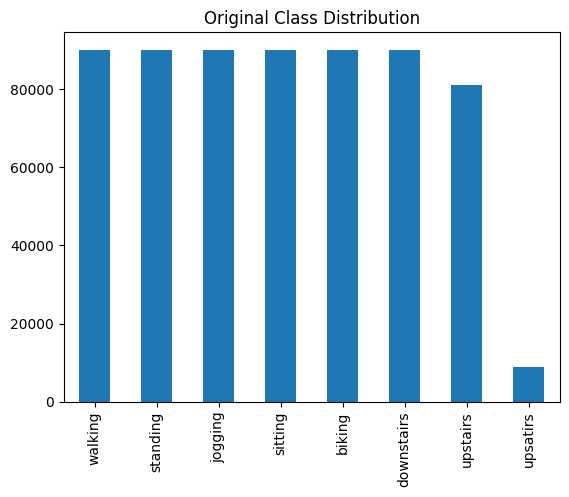

In [4]:
df.activity.value_counts().plot(kind='bar',title="Original Class Distribution")

<Axes: title={'center': 'Class distribution after Correction'}>

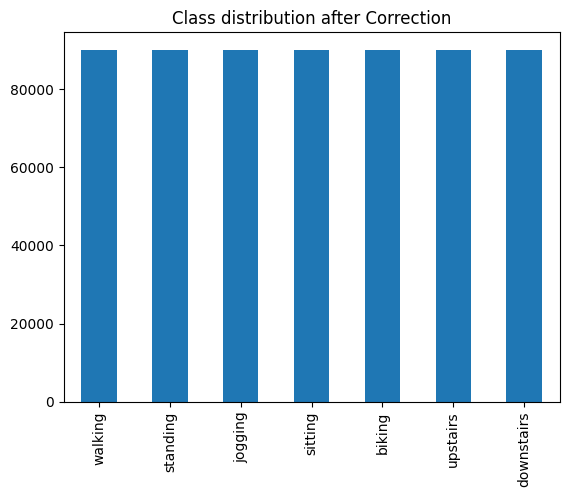

In [5]:
df.replace('upsatirs','upstairs',inplace=True)
df.activity.value_counts().plot(kind='bar', title='Class distribution after Correction')

**Model Development with H2o:**

The AutoML function is used for finding the best model and data preparation techniques that give the best performance on our specific dataset.

In [8]:
#use automl using h2o to predict the activity

import h2o
from h2o.automl import H2OAutoML

#shut down h2o instance if any
if h2o.connection():
  h2o.cluster().shutdown()
h2o.init()


# Set the list of algorithms to include
#include_algos = ["XGBoost", "DRF", "GBM", "DeepLearning", "StackedEnsemble"]
df['activity']=df['activity'].astype('category')

classification_metrics = "logloss"


h2o_df=h2o.H2OFrame(df)
h2o_df['activity']=h2o_df['activity'].asfactor()

train,test=h2o_df.split_frame(ratios=[0.8],seed=1)

x=h2o_df.columns
y='activity'
x.remove(y)

aml=H2OAutoML(max_runtime_secs=1800, stopping_metric='logloss', stopping_rounds=5, seed=1,sort_metric=classification_metrics)
aml.train(x=x,y=y,training_frame=train)

lb=aml.leaderboard
print(lb.head(rows=lb.nrows))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6jt0zo62
  JVM stdout: /tmp/tmp6jt0zo62/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6jt0zo62/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_4719nn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:20:37.729: _train param, Dropping bad and constant columns: [time_stamp]

████████████████████
17:29:44.39: _train param, Dropping bad and constant columns: [time_stamp]

█████████████████
17:38:14.336: _train param, Dropping bad and constant columns: [time_stamp]

█████████████████
17:46:37.701: _train param, Dropping unused columns: [time_stamp]

█████████| (done) 100%
model_id                                                   logloss    mean_per_class_error       rmse         mse
XGBoost_1_AutoML_1_20230914_172032                       0.0250151              0.00319265  0.0637389  0.00406265
StackedEnsemble_BestOfFamily_1_AutoML_1_20230914_172032  0.0354124              0.00276303  0.0699251  0.00488952
GBM_1_AutoML_1_20230914_172032                           0.0405688              0.00331571  0.0777221  0.00604073
GLM_1_AutoML_1_20230914_172032                       

In [29]:
y

'activity'

**Model Performance Evaluation**

In [45]:
perf=aml.leader.model_performance(test)
print(perf)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.004192911786218983
RMSE: 0.06475269713470616
LogLoss: 0.02553906797544525
Mean Per-Class Error: 0.003112251758586136
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
biking    downstairs    jogging    sitting    standing    upstairs    walking    Error        Rate
--------  ------------  ---------  ---------  ----------  ----------  ---------  -----------  -------------
18135     4             0          0          0           1           0          0.000275634  5 / 18,140
11        17662         11         0          1           112         16         0.00847696  

In [37]:
pred=aml.predict(test.drop(['time_stamp','activity']))
#h2o.cluster().shutdown()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [36]:
test.drop(['time_stamp','activity'])
test

time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,activity
1.39e+12,-0.57205,-14.628,-1.757,-0.2176,-4.8531,-1.0565,-1.0492,0.29138,0.2923,12.42,40.68,-8.1,-4.6309,-16.603,2.0703,-4.3455,-6.8081,1.6889,-3.3851,-1.992,1.1228,18.72,55.8,-4.26,0.57205,-12.626,2.2474,-6.7655,-6.5138,0.017921,-0.70952,1.1582,0.99724,-31.26,29.22,3.24,1.5663,-9.0848,-4.5764,-1.0036,0.20153,-2.7515,0.28772,0.10049,1.2071,-19.02,31.68,17.52,5.6116,-2.1248,-1.2667,-4.0408,-0.55974,-0.52369,0.32284,0.43127,0.21197,-21.6,7.5,5.64,walking
1.39e+12,4.699,-15.963,2.2201,3.7356,-6.2265,1.5558,-2.6179,2.9557,-1.2294,11.94,42.06,-5.16,1.2258,-3.1599,4.1542,0.43677,6.5525,3.0512,-2.3027,-2.7791,0.65179,22.92,53.1,6,3.5413,-13.634,1.7298,-1.0392,-5.0927,0.23454,-1.1518,-1.4713,2.4462,-31.14,29.22,0.48,0.35413,-7.4776,-1.9613,-0.47097,2.1787,-0.4625,0.15058,1.7364,1.7932,-16.08,33.9,15.96,17.025,-2.5198,-10.815,7.3653,-0.86419,-10.48,-0.40989,0.0048869,0.53665,-20.88,10.92,5.76,walking
1.39e+12,0.83084,-0.69464,1.7025,0.033111,8.4008,-1.8761,0.3375,1.584,0.7138,4.5,37.5,22.02,-4.9033,-15.8,-7.9679,-1.7684,-7.4132,-3.9666,-1.9419,-1.0507,0.74006,33.18,49.62,9.96,5.6933,-9.3027,1.1713,5.0041,0.46098,0.56642,-0.74342,0.26237,1.777,-20.58,36.72,8.46,0.23155,-8.1858,-1.8932,2.0435,1.2957,-0.16472,0.31673,0.34483,0.77855,-5.04,37.68,14.04,8.8668,-1.9613,1.6753,-0.75655,-0.28358,2.5389,-0.37141,0.54917,-0.64538,-20.46,11.22,8.16,walking
1.39e+12,-4.0316,-16.821,-0.24517,-5.4785,-7.2904,-2.046,4.1023,-2.1475,0.82956,1.5,35.7,25.74,-1.2939,-6.3743,-4.0316,-1.6409,3.4207,-3.7029,1.0446,-2.2642,-0.43005,21.84,55.56,4.44,4.0589,-14.71,2.0567,1.4062,-5.3221,1.0559,0.80176,-2.4508,-2.1811,-7.62,41.04,13.2,-0.6674,-7.464,-0.72188,-1.4356,2.2736,0.15064,-0.39065,-1.1875,-1.8958,-1.98,39.66,13.62,14.288,-0.99429,1.185,4.7635,1.0752,0.10032,-0.45173,1.0211,-0.55986,-22.74,8.7,3.9,walking
1.39e+12,-1.8387,-10.992,-0.42223,-2.6042,-1.3058,-1.7524,1.6887,-2.3772,1.5663,2.94,36.36,24,0.21793,-7.3822,2.5061,0.20432,2.4227,2.6873,1.0608,5.007,-0.42058,20.04,56.58,1.38,2.8739,-12.395,1.6481,-0.38928,-3.2027,0.63201,0.70983,-2.084,-2.4083,-9.06,40.86,12.96,-0.49033,-5.5707,-0.12258,-1.864,4.0779,0.96698,-0.72235,-0.49847,-1.7452,-4.08,39.3,14.4,12.79,-1.2258,4.3177,3.2227,0.44342,2.9535,-0.022297,0.35736,-1.2208,-22.92,8.94,3.6,walking
1.39e+12,-1.7025,-13.974,-1.1577,-2.2969,-4.1906,-1.4638,1.5296,1.2706,-0.48289,14.52,39.84,1.14,0.6674,-13.321,-2.8603,-1.2346,-3.797,-1.4995,-2.4367,-2.0284,-0.042455,18.18,58.2,-7.26,0.20431,-8.717,1.7706,-7.523,-2.8867,0.2,-0.058948,0.62003,-1.4337,-29.7,34.2,4.32,2.4108,-12.463,-2.0567,-0.85762,-3.4094,-0.17871,-0.19517,0.70616,0.64568,-17.4,33.42,18.72,4.0589,-1.471,0.40861,-5.673,-0.37367,0.91616,1.7975,-0.99143,0.60995,-22.38,4.68,5.22,walking
1.39e+12,-2.261,-15.759,-0.20431,-1.4041,-6.0049,0.34295,-0.66035,-1.0608,0.26603,14.88,38.82,-4.38,-1.3484,-17.366,2.0567,-1.8453,-7.572,2.0062,-3.1878,-0.58429,0.63774,17.94,57.84,-2.7,0.85808,-11.782,1.6481,-6.7684,-5.9883,-0.46037,-0.52229,1.0825,0.50855,-33.48,29.94,3.06,1.5391,-8.6762,-4.0725,-0.94278,0.64776,-2.3189,0.39156,0.44563,1.2477,-18.36,32.64,18.72,5.993,-2.4789,-0.49033,-3.6524,-0.88524,0.28259,0.90347,0.31826,0.29535,-20.46,6.54,7.32,walking
1.39e+12,4.0316,-17.311,1.9068,3.3625,-7.546,1.3076,-2.5268,2.9612,-1.5898,14.76,38.28,-2.82,1.6072,-4.0316,4.9033,0.16753,5.5278,3.2557,-2.1551,-3.4489,0.53848,24.72,51.24,11.22,4.1678,-13.866,2.1112,-0.2059,-5.1615,0.97912,-1.2685,-1.7446,2.5898,-33.06,29.58,0.54,0.095342,-8.0496,-2.2746,-0.87598,1.6275,-1.0172,0.19059,1.755,1.627,-14.7,34.92,16.86,16.208,-1.7434,-7.9815,6.5666,0.032634,-7.7459,-0.53237,-0.35949,0.45509,-18.36,10.56,7.02,walking
1.39e+12,3.7047,-15.309,1.3484,2.8509,-5.56,0.72157,-2.098,3.1059,-1.4529,14

**Evaluating the AUC-ROC curve for each class.**

Higher ROC indicates better distinction from other classes.

0 standing
1 upstairs
2 sitting
3 walking
4 biking
5 jogging
6 downstairs


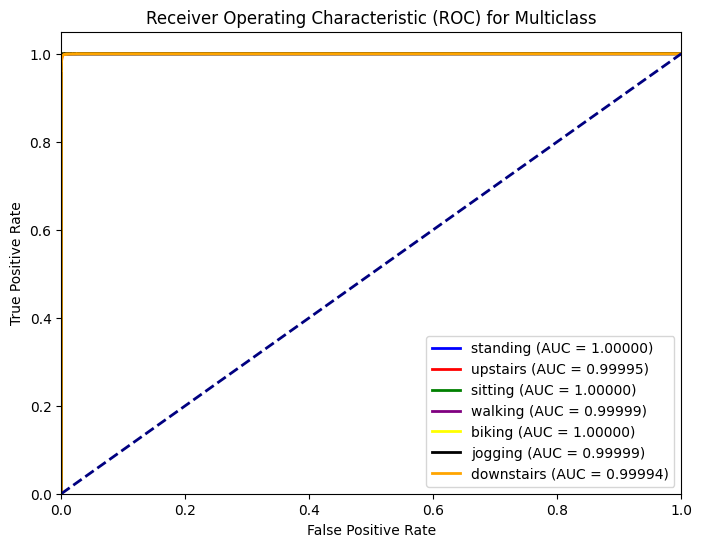

In [42]:
import h2o
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Initialize H2O cluster
#h2o.init()

true_labels = test['activity'].as_data_frame()['activity'].values

# Get unique classes from the target column
unique_classes = set(true_labels)

# Initialize variables to store fpr and tpr for each class
fpr = []
tpr = []
roc_auc = []

# Compute ROC curve and ROC AUC for each class
for i, class_label in enumerate(unique_classes):
    # Binarize the true labels for the current class
    true_labels_bin = label_binarize(true_labels, classes=[class_label])
    true_labels_bin=true_labels_bin.tolist()

    true_labels_bin_=[]
    for i in true_labels_bin:
      true_labels_bin_.append(i[0])
    # Get predicted probabilities for the current class
    probs = pred.as_data_frame()[f'{class_label}'].values.tolist()

    # Compute ROC curve and ROC AUC for the current class
    x, y, _ = roc_curve(true_labels_bin_, probs)
    z = auc(x, y)

    fpr.append(x)
    tpr.append(y)
    roc_auc.append(z)


# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple','yellow','black','orange']  # Add more colors if needed


for i, class_label in enumerate(unique_classes):
    print(i, class_label)
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_label} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Shutdown the H2O cluster (when you're done)
#h2o.shutdown()


In [27]:
train

time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,activity
1.39e+12,-1.8115,-14.873,-1.3484,-1.2691,-5.1057,-0.66445,-0.53206,-3.1869,0.23976,12.72,40.74,-6,-1.1986,-13.852,3.7865,-1.7698,-4.0625,3.8985,-3.6255,1.0739,0.13622,18.84,55.92,-6.72,0.17706,-10.569,1.8251,-7.5051,-4.7736,-0.062476,-0.36652,1.2706,-0.52412,-30.3,31.08,3.96,2.7922,-12.572,-4.3177,-0.098712,-3.3857,-2.4648,0.021075,1.0299,1.2269,-18.72,31.74,17.82,4.3177,-2.3699,-0.43585,-5.3574,-0.95749,0.31886,0.52565,-0.18815,0.28588,-22.2,6.48,4.56,walking
1.39e+12,0.24517,-14.07,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.7966,0.40745,12.54,40.74,-6.78,-2.3836,-16.59,2.9965,-2.7025,-6.789,2.8682,-3.4899,0.39034,0.40073,18.6,55.86,-6.06,0.16344,-12.19,2.0703,-7.3573,-6.2618,-0.042442,-0.54459,1.2807,0.34025,-31.02,29.88,3.36,2.3836,-10.992,-4.6037,-0.40444,-1.7745,-2.7483,0.20189,0.53573,1.3228,-18.84,31.74,17.7,5.1213,-2.1929,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.19823,-21.9,7.14,5.34,walking
1.39e+12,-0.69464,-12.939,-3.0918,-0.32273,-3.1786,-2.2197,-2.372,1.0082,0.34972,12.3,40.74,-8.52,-4.7807,-16.453,1.1577,-4.1954,-6.6731,0.74084,-3.1017,-3.0439,0.79138,18.84,55.62,-3.12,1.2122,-12.476,2.2882,-5.9716,-6.199,0.01676,-0.78191,1.102,1.3338,-31.44,28.8,3.24,-0.61292,-8.5263,-2.9284,-2.8271,0.85949,-1.1467,0.17593,-0.21441,0.90469,-18.96,31.86,17.22,6.0611,-1.471,-2.4789,-3.5908,0.15795,-1.8802,0.20403,0.72846,0.16493,-21.12,8.4,6.12,walking
1.39e+12,0.8717,-12,-1.5663,1.1374,-2.239,-0.65476,-2.7901,0.65485,0.22724,12.24,40.8,-8.88,-0.92618,-12.19,-1.0624,-0.18116,-2.4144,-1.285,-2.7587,-4.4602,0.69364,19.38,55.44,-0.84,2.2474,-11.387,1.9886,-4.6603,-4.823,-0.32974,-0.82436,0.90561,2.156,-31.56,28.32,3.3,-1.185,-9.3436,-2.2337,-3.2099,0.085583,-0.45569,-0.033292,-0.48625,0.6072,-18.84,32.1,17.04,7.7091,-0.77636,-3.5413,-1.945,0.85796,-2.9953,0.09896,0.94379,0.064752,-20.94,8.7,6.3,walking
1.39e+12,0.20431,-11.468,4.3449,0.36136,-1.6669,4.6245,-3.0504,0.90316,0.23213,11.94,41.16,-8.82,1.6072,-12.013,-3.2144,2.1723,-2.2228,-3.1871,-1.7144,-4.288,0.3485,19.8,55.08,0.18,3.8001,-9.3436,0.85808,-2.588,-2.2721,-1.4563,-0.77061,0.63774,2.4914,-31.74,27.96,2.82,-1.3348,-9.8611,-1.866,-3.2605,-0.41371,-0.074786,0.021075,-0.42913,0.62644,-18.54,32.22,16.86,11.21,-0.98067,-1.6753,1.543,0.63528,-1.3342,0.18326,0.81215,-0.033292,-20.7,9.3,6.42,walking
1.39e+12,0.50395,-12.503,4.3177,0.60418,-2.6978,4.2197,-2.7871,0.20617,0.29963,11.94,41.28,-8.4,3.1054,-11.673,-1.7025,3.3957,-1.8714,-1.5534,-2.3983,-2.0711,-0.18815,20.34,54.6,1.32,4.5764,-9.7794,0.40861,-1.4283,-2.3619,-1.8484,-0.76694,0.20159,2.6976,-31.68,27.96,2.34,-1.4029,-11.032,-1.7979,-3.0548,-1.5343,-0.0016346,0.28344,0.032987,0.86682,-17.88,32.64,16.68,12.612,-1.5119,0.98067,2.94,0.083211,1.2442,0.58857,0.52046,-0.25137,-20.64,9.66,6.3,walking
1.39e+12,2.6015,-16.086,3.4187,2.4854,-6.286,3.0661,-2.5388,-0.020464,-0.38607,11.88,41.46,-7.98,4.3585,-5.8159,4.0316,5.3955,0.99247,3.2744,-2.5119,-1.6286,-0.1799,20.76,54.3,2.46,5.0259,-11.618,0.35413,-0.36233,-3.6773,-1.6657,-0.85185,-0.40897,2.7642,-31.5,28.26,1.44,-1.1986,-10.61,-1.7706,-2.6513,-1.067,-0.042722,0.4667,0.60995,1.2046,-17.52,32.94,16.56,15.854,-5.8567,2.2337,5.1271,-2.5343,3.3763,0.6466,0.35125,-0.25992,-20.7,10.02,6.18,walking
1.39e+12,4.9442,-17.87,2.0839,4.2277,-8.1064,1.5083,-2.583,1.6964,-1.033,12,41.82,-6.3,2.7104,-4.0452,3.8954,2.0099,5.7077,3.1472,-2.6154,-2.9373,0.42486,22.26,53.58,4.8,4.4811,-13.157,1.076,-0.49862,-4.8988,-0.70463,-1.0629,-1.2223,2.6041,-31.38,28.74,0.9,-0.25879,-9.0303,-1.9341,-1.3467,0.58776,-0.35933,0.4441,1.1414,1.5015,-16.5,33.48,16.14,17.243,-4.6037,-10.12,7.5748,-2.971,-9.9641,0.048869,0.31551,0.35613,-20.76,10.62,5.82,walking
1.39e+12,4.5083,-14.492,2.0294,3.3325,-4.784,1.294

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20230914_172032

biking,downstairs,jogging,sitting,standing,upstairs,walking,Error,Rate
18135.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0002756,"5 / 18,140"
11.0,17662.0,11.0,0.0,1.0,112.0,16.0,0.0084770,"151 / 17,813"
1.0,5.0,17538.0,0.0,0.0,10.0,25.0,0.0023323,"41 / 17,579"
0.0,0.0,0.0,18023.0,0.0,0.0,0.0,0.0,"0 / 18,023"
0.0,4.0,0.0,0.0,17902.0,0.0,7.0,0.0006141,"11 / 17,913"
2.0,88.0,5.0,0.0,0.0,18126.0,21.0,0.0063590,"116 / 18,242"
0.0,20.0,6.0,0.0,0.0,41.0,17906.0,0.0037278,"67 / 17,973"
18149.0,17783.0,17560.0,18023.0,17903.0,18290.0,17975.0,0.0031110,"391 / 125,683"


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

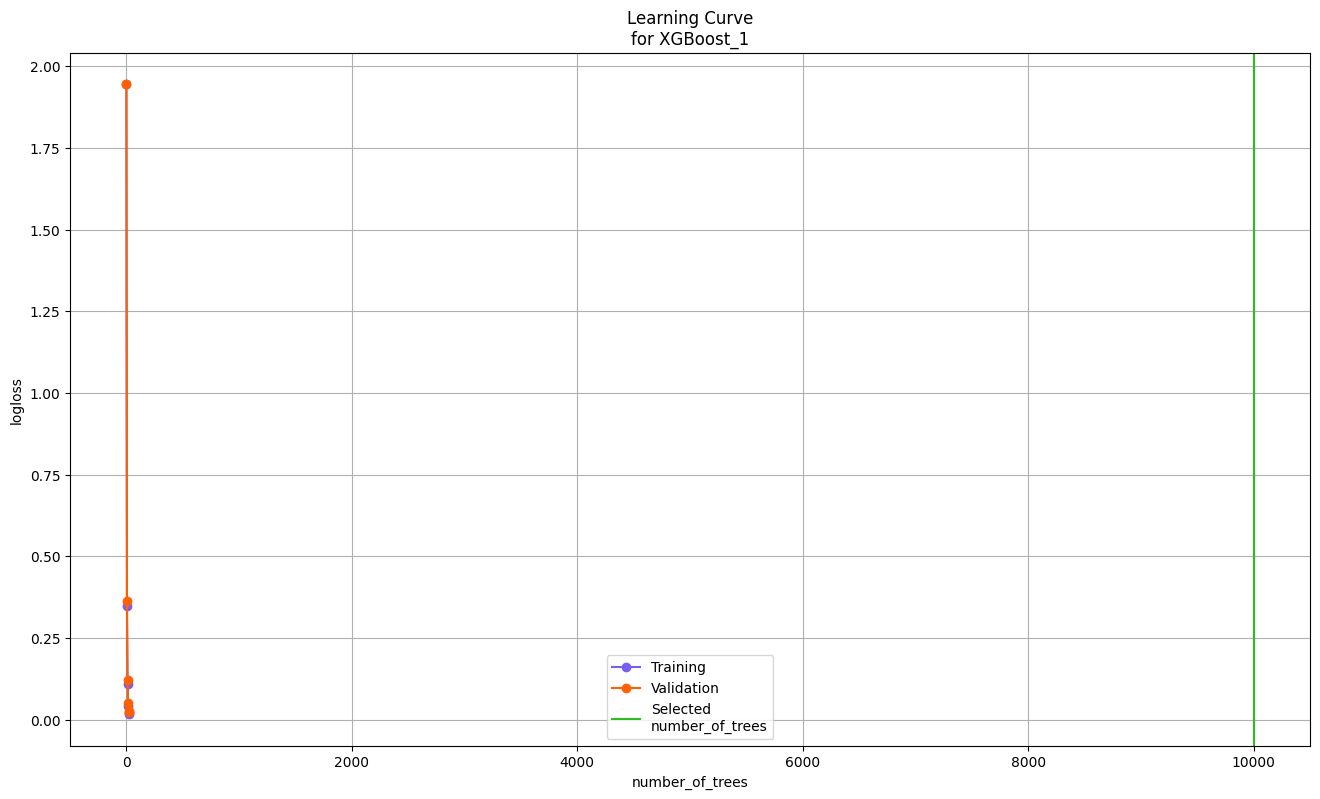

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

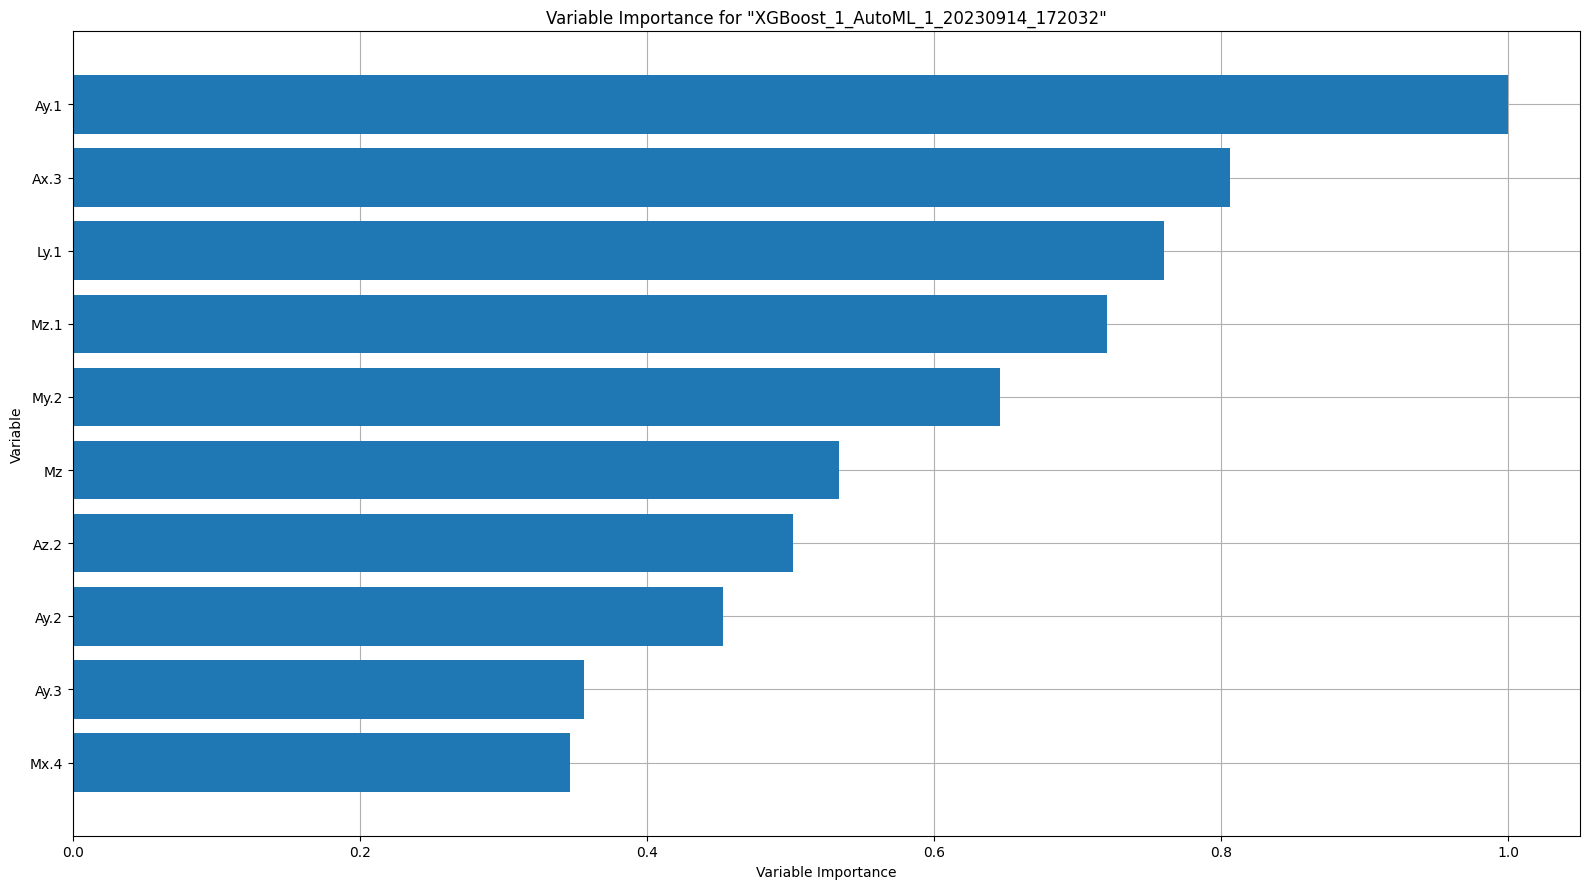

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

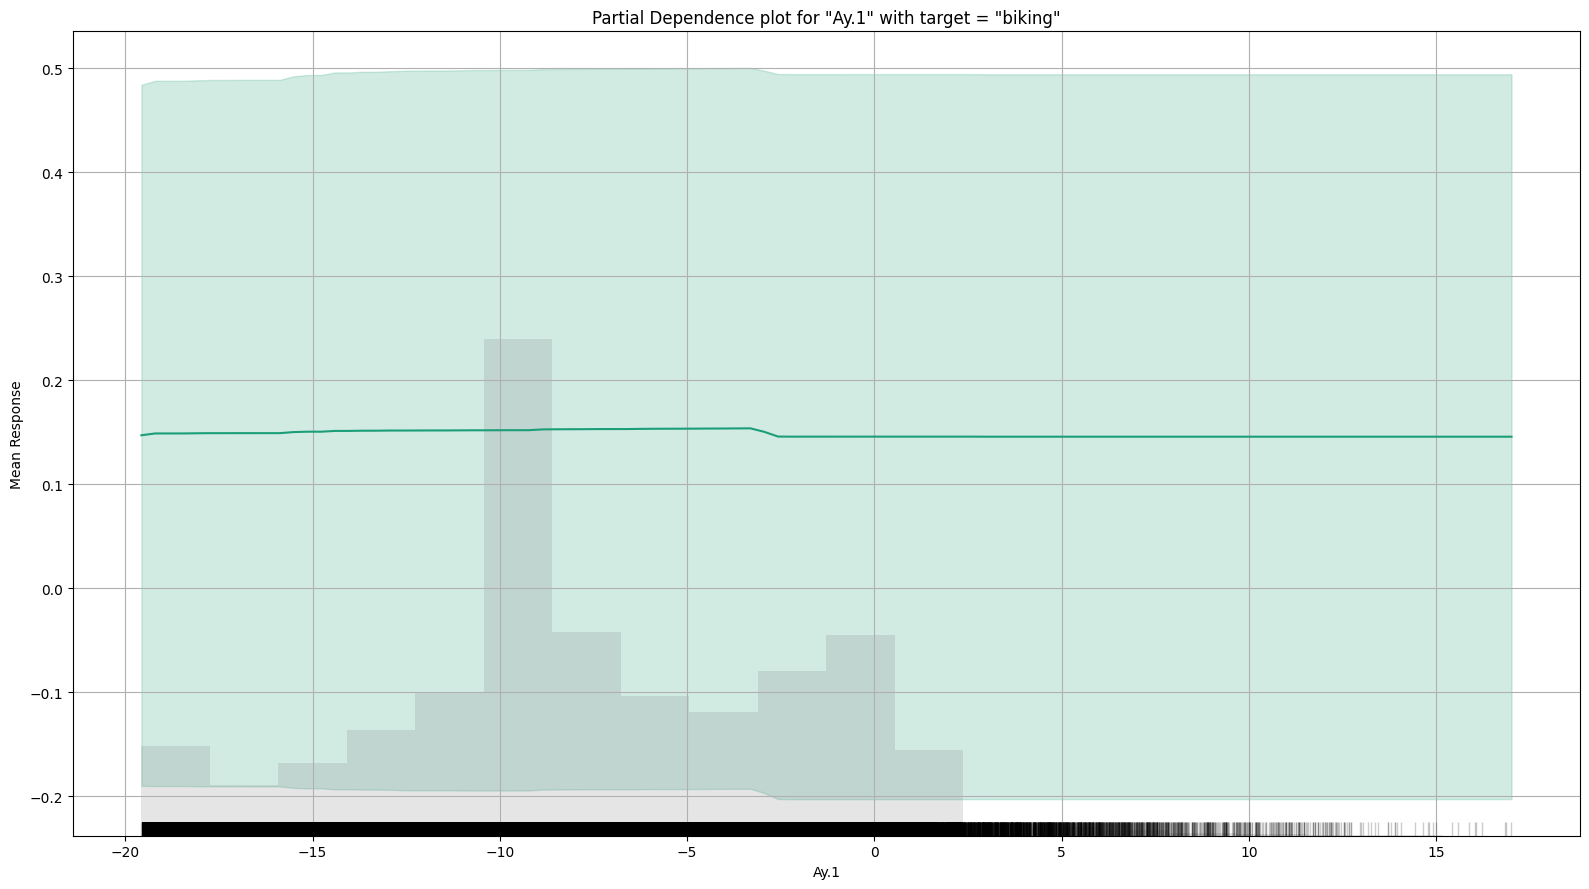

H2OJobCancelled: ignored

<Figure size 1600x900 with 0 Axes>

In [14]:
# Explain leader model & compare with all AutoML models
#exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)
